In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
# Seleção dos dados que serão utilizados na análise
dataset2017 = pd.read_csv('../Deputados/data/Ano-2017.csv', sep=';',
                         dtype={'idecadastro': np.str,
                                'ideDocumento': np.str},
                         converters={'vlrLiquido': lambda x: float(x.replace(',','.'))},
                         low_memory=False)
dataset2016 = pd.read_csv('../Deputados/data/Ano-2016.csv', sep=';',
                         dtype={'idecadastro': np.str,
                                'ideDocumento': np.str},
                         converters={'vlrLiquido': lambda x: float(x.replace(',','.'))},
                         low_memory=False)
dataset2015 = pd.read_csv('../Deputados/data/Ano-2015.csv', sep=';',
                         dtype={'idecadastro': np.str,
                                'ideDocumento': np.str},
                         converters={'vlrLiquido': lambda x: float(x.replace(',','.'))},
                         low_memory=False)


# Organização dos dados, limpeza de colunas descartáveis, renomeação de categorias
dataset = pd.concat([dataset2017, dataset2016, dataset2015])
dataset = dataset[['txNomeParlamentar',
                   'nuLegislatura',
                   'sgPartido',
                   'idecadastro', 
                   'sgUF', 
                   'numSubCota', 
                   'txtDescricao', 
                   'datEmissao', 
                   'vlrLiquido', 
                   'numMes', 
                   'numAno', 
                   'ideDocumento']]
dataset['txtDescricao'] = dataset['txtDescricao'].astype('category')
dataset['txtDescricao'].cat.rename_categories(['Assinatura de publicações', 
                                              'Combustíveis e lubrificantes',
                                              'Consultorias, pesquisas e trabalhos técnicos',
                                              'Divulgação de atividade parlamentar', 
                                              'Emissão de bilhete aéreo',
                                              'Alimentação do parlamentar',
                                              'Hospedagem fora do DF',
                                              'Aluguel de aeronaves',
                                              'Aluguel de embarcações',
                                              'Aluguel de carros', 
                                              'Manutenção de escritório',
                                              'Cursos, palestras ou eventos', 
                                              'Passagens aéreas',
                                              'Passagens terrestres ou marítimas',
                                              'Segurança particular',
                                              'Táxi, pedágio e estacionamento', 
                                              'Serviços postais', 
                                              'Telefonia'], inplace=True)
dataset['txtDescricao'] = dataset['txtDescricao'].astype(str)

In [3]:
dataset = dataset[dataset['nuLegislatura']== 2015]

In [4]:
posse = pd.read_csv('../Deputados/scrapers/Atuacao_Deputados.csv', encoding='latin1', sep=';')

In [5]:
from datetime import date

def tempo_servico(periodo):
    dias = 0
    if periodo == "1/2/2015 ...":
        periodo = periodo.split(" ")[0]
        periodo = periodo.split("/")
        comeco = date(day= int(periodo[0]), month= int(periodo[1]), year= int(periodo[2]))
        hoje = date(day=21, month=8, year=2017)
        dif = hoje - comeco
        return int(math.ceil(dif.days/30))
    else:
        periodo = periodo.split(",")
        for atuacao in periodo:
            comeco = atuacao.split("até")[0]
            comeco = comeco.split("/")
            comeco = date(day= int(comeco[0]), month= int(comeco[1]), year= int(comeco[2].split(" ")[0]))
            if "..." not in atuacao:
                fim = atuacao.split("até")[1]
                fim = fim.split("/")
                fim = date(day= int(fim[0]), month= int(fim[1]), year= int(fim[2]))
                dif = fim - comeco
                dias += dif.days
            else:
                hoje = date(day=21, month=8, year=2017)
                dif = hoje - comeco
                dias += dif.days
        return int(math.ceil(dias/30))
                

In [6]:
posse['Atuacao em meses'] = posse['Atuacao'].apply(tempo_servico)
#posse['Atuacao em meses'] = posse['Atuacao em meses'].map("{0:.2f}".format)

In [7]:
dataset.rename(columns={'txNomeParlamentar':'Nome'}, inplace=True)
dataset = posse.merge(dataset,on='Nome')
dataset.drop(['Nome', 'nuLegislatura'], axis=1,inplace=True) #dataset.drop(['Nome','sgUF'], axis=1,inplace=True)

In [8]:
dados = pd.read_csv('../Deputados/scrapers/Detalhes_Deputados.csv',encoding='latin1')
#dados = dados[dados['Legislatura'] == 55]
dados.drop(['Legislatura','UF'], axis=1,inplace=True)
dados.rename(columns={'Partido': 'Partido Atual','Nome':'Nome Civil'}, inplace=True)
dados['idecadastro'] = dados['idecadastro'].astype(str)
dataset = dados.merge(dataset,on='idecadastro')

In [9]:
dados.head(5)

idecadastro                      Nome Civil      Nome Parlamentar  \
0      178957   ABEL SALVADOR MESQUITA JUNIOR     ABEL MESQUITA JR.   
1      178864       JOSE ADAIL CARNEIRO SILVA        ADAIL CARNEIRO   
2      178914  ADALBERTO CAVALCANTI RODRIGUES  ADALBERTO CAVALCANTI   
3      178890            ADELMO CARNEIRO LEAO  ADELMO CARNEIRO LEÃO   
4      178968      ADELSON BARRETO DOS SANTOS       ADELSON BARRETO   

                   Profissao Situacao na Legislatura Atual Sexo Partido Atual  
0                 Empresário                  Em Exercício    M           DEM  
1                          -                  Em Exercício    M            PP  
2  Administrador de Empresas                  Em Exercício    M           PTB  
3               Professor(a)                  Em Exercício    M            PT  
4      Jornalista,Radialista                  Em Exercício    M            PR

In [10]:
dataset.head(5)

idecadastro                     Nome Civil   Nome Parlamentar   Profissao  \
0      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
1      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
2      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
3      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
4      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   

  Situacao na Legislatura Atual Sexo Partido Atual       Atuacao  \
0                  Em Exercício    M           DEM  1/2/2015 ...   
1                  Em Exercício    M           DEM  1/2/2015 ...   
2                  Em Exercício    M           DEM  1/2/2015 ...   
3                  Em Exercício    M           DEM  1/2/2015 ...   
4                  Em Exercício    M           DEM  1/2/2015 ...   

   Atuacao em meses sgPartido sgUF  numSubCota                  txtDescricao  \
0                32       DEM   RR           1      Manutenção de escritório   
1                32       DEM   RR           3  Combustíveis e lubrificantes   
2                32       DEM   RR           3  Combustíveis e lubrificantes   
3                32       DEM   RR           3  Combustíveis e lubrificantes   
4                32       DEM   RR           3  Combustíveis e lubrificantes   

            datEmissao  vlrLiquido  numMes  numAno ideDocumento  
0  2017-04-26 00:00:00       296.0       4    2017      6266962  
1  2017-05-03 00:00:00       100.0       5    2017      6306682  
2  2017-05-08 00:00:00       150.0       5    2017      6306518  
3  2017-05-10 00:00:00        60.0       5    2017      6306675  
4  2017-05-11 00:00:00        50.0       5    2017      6306669

In [11]:
dataset.to_csv("CEAP-BR.csv", sep=';', encoding='latin1',index=False)

In [12]:
# Contagem de notas fiscais em análise, por categoria
print("Quantidade de notas fiscais em análise, por categoria:")
dataset['txtDescricao'].value_counts()

Quantidade de notas fiscais em análise, por categoria:


Emissão de bilhete aéreo                        271112
Combustíveis e lubrificantes                    181048
Telefonia                                        84677
Serviços postais                                 74712
Alimentação do parlamentar                       69315
Táxi, pedágio e estacionamento                   68428
Manutenção de escritório                         56900
Divulgação de atividade parlamentar              26406
Aluguel de carros                                15255
Hospedagem fora do DF                            14528
Consultorias, pesquisas e trabalhos técnicos      7322
Passagens aéreas                                  6455
Passagens terrestres ou marítimas                 2516
Segurança particular                              2241
Assinatura de publicações                         2183
Aluguel de aeronaves                               815
Aluguel de embarcações                              82
Cursos, palestras ou eventos                        57
Name: txtD

In [13]:
dataset.head()

idecadastro                     Nome Civil   Nome Parlamentar   Profissao  \
0      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
1      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
2      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
3      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
4      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   

  Situacao na Legislatura Atual Sexo Partido Atual       Atuacao  \
0                  Em Exercício    M           DEM  1/2/2015 ...   
1                  Em Exercício    M           DEM  1/2/2015 ...   
2                  Em Exercício    M           DEM  1/2/2015 ...   
3                  Em Exercício    M           DEM  1/2/2015 ...   
4                  Em Exercício    M           DEM  1/2/2015 ...   

   Atuacao em meses sgPartido sgUF  numSubCota                  txtDescricao  \
0                32       DEM   RR           1      Manutenção de escritório   
1                32       DEM   RR           3  Combustíveis e lubrificantes   
2                32       DEM   RR           3  Combustíveis e lubrificantes   
3                32       DEM   RR           3  Combustíveis e lubrificantes   
4                32       DEM   RR           3  Combustíveis e lubrificantes   

            datEmissao  vlrLiquido  numMes  numAno ideDocumento  
0  2017-04-26 00:00:00       296.0       4    2017      6266962  
1  2017-05-03 00:00:00       100.0       5    2017      6306682  
2  2017-05-08 00:00:00       150.0       5    2017      6306518  
3  2017-05-10 00:00:00        60.0       5    2017      6306675  
4  2017-05-11 00:00:00        50.0       5    2017      6306669

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884052 entries, 0 to 884051
Data columns (total 18 columns):
idecadastro                      884052 non-null object
Nome Civil                       884052 non-null object
Nome Parlamentar                 884052 non-null object
Profissao                        884052 non-null object
Situacao na Legislatura Atual    884052 non-null object
Sexo                             884052 non-null object
Partido Atual                    884052 non-null object
Atuacao                          884052 non-null object
Atuacao em meses                 884052 non-null int64
sgPartido                        884052 non-null object
sgUF                             884052 non-null object
numSubCota                       884052 non-null int64
txtDescricao                     884052 non-null object
datEmissao                       866179 non-null object
vlrLiquido                       884052 non-null float64
numMes                           884052 non-null i

In [15]:
dataset.groupby(['Nome Civil','sgPartido'])['vlrLiquido'].sum().sort_values(ascending=False)

Nome Civil                                sgPartido
JOHNATHAN PEREIRA DE JESUS                PRB          1369412.36
ÉDIO VIEIRA LOPES                         PR           1355543.07
VINICIUS DE AZEVEDO GURGEL                PR           1322934.08
ALAN RICK MIRANDA                         PRB          1318617.83
NILTON BALBINO                            PTB          1316208.00
HIRAN MANUEL GONCALVES DA SILVA           PP           1309990.52
ABEL SALVADOR MESQUITA JUNIOR             DEM          1294642.78
REMIDIO MONAI MONTESSI                    PR           1294119.17
JESSICA ROJAS SALES                       PMDB         1288358.20
CARLOS AUGUSTO ANDRADE SILVA              PHS          1286133.89
LINDOMAR BARBOSA ALVES                    PRB          1274964.91
WHERLES FERNANDES DA ROCHA                PSDB         1274357.75
ZENAIDE MAIA CALADO PEREIRA DOS SANTOS    PR           1274016.86
DOMINGOS GOMES DE AGUIAR NETO             PSD          1273739.30
LEONARDO CUNHA DE BRITO 

In [16]:
dataset.groupby(['Nome Civil','sgPartido'])['vlrLiquido'].sum().sort_values()

Nome Civil                                sgPartido
MARCIO CAMPOS MONTEIRO                    PSDB              14.18
ROGÉRIO SILVA SANTOS                      PMDB              41.87
SEBASTIAO IGNACIO DE OLIVEIRA JUNIOR      PR               116.41
JOSIAS GOMES DA SILVA                     PT              1003.62
MIGUEL CORRÊA DA SILVA JÚNIOR             PT              1840.11
ODAIR JOSÉ DA CUNHA                       PT              1897.29
FELIPE AUGUSTO LYRA CARRERAS              PSB             3025.76
GIOVANI BATISTA FELTES                    PMDB            4206.66
NELSON NAHIM MATHEUS DE OLIVEIRA          PSD             5086.14
ARNALDO CALIL PEREIRA JARDIM              PPS             6208.88
ATILA ALEXANDRE NUNES PEREIRA             PMDB            6485.39
ANTONIO FLORIANO PEREIRA PESARO           PSDB           12090.88
RODRIGO SANTOS DA ROCHA LOURES            PMDB           12678.29
REJANE RIBEIRO SOUSA DIAS                 PT             13212.61
MARCIO DELLA VALLE BIOLC

In [17]:
df = dataset.groupby(['Nome Civil','sgPartido','numAno']).sum()

In [18]:
result_df = df.loc[df.index.get_level_values('numAno') == 2017]
result_df['vlrLiquido'].sort_values(ascending=False)

Nome Civil                               sgPartido  numAno
ALAN RICK MIRANDA                        PRB        2017      304308.39
ZENAIDE MAIA CALADO PEREIRA DOS SANTOS   PR         2017      292961.27
NIVALDO FERREIRA DE ALBUQUERQUE NETO     PRP        2017      292045.65
LUIZ ODORICO MONTEIRO DE ANDRADE         PSB        2017      290129.15
CARLOS VICTOR GUTERRES MENDES            PSD        2017      287691.11
LINDOMAR BARBOSA ALVES                   PRB        2017      286413.18
JOHNATHAN PEREIRA DE JESUS               PRB        2017      285700.63
MARIA GORETE PEREIRA                     PR         2017      283143.82
EXPEDITO GONCALVES FERREIRA NETTO        PSD        2017      282343.86
DAGOBERTO NOGUEIRA FILHO                 PDT        2017      282333.90
MOISES DINIZ LIMA                        PCdoB      2017      280072.05
RUBENS PEREIRA E SILVA JUNIOR            PCdoB      2017      279198.90
JESSICA ROJAS SALES                      PMDB       2017      278309.44
VANDE

In [19]:
valor = dataset.groupby('sgPartido')['vlrLiquido'].sum().sort_values(ascending=False)
valor.head(30)

sgPartido
PMDB     6.689220e+07
PT       6.163547e+07
PP       4.848202e+07
PSDB     4.838382e+07
PR       4.077421e+07
PSD      3.779344e+07
PSB      3.626992e+07
DEM      2.878404e+07
PRB      2.521972e+07
PDT      2.110137e+07
PTB      2.053458e+07
PODE     1.535471e+07
SD       1.453428e+07
PCdoB    1.282658e+07
PPS      8.531037e+06
PSC      8.528746e+06
PHS      7.010041e+06
PV       6.107823e+06
PSOL     5.137567e+06
PROS     3.866179e+06
REDE     3.429493e+06
PTdoB    3.315743e+06
PEN      3.135566e+06
PSL      2.101042e+06
PMB      1.023936e+06
PRP      6.053950e+05
PRTB     1.674133e+05
Name: vlrLiquido, dtype: float64

In [20]:
df = dataset.groupby(['Nome Civil','sgPartido'])['vlrLiquido'].sum()

In [21]:
qtd = df.index.get_level_values('sgPartido').value_counts()
qtd.head(30)

PMDB     81
PT       68
PSDB     59
PP       53
PR       43
PSD      42
PSB      41
DEM      32
PRB      26
PDT      25
PTB      21
PODE     16
SD       14
PCdoB    14
PPS      12
PSC      11
PV        8
PHS       7
PSOL      6
PROS      5
REDE      4
PTdoB     4
PEN       3
PSL       2
PMB       1
PRP       1
PRTB      1
Name: sgPartido, dtype: int64

In [22]:
partidos = pd.DataFrame(data=list(qtd.sort_index()),index=list(qtd.sort_index().index),columns=['Quantidade'])

In [23]:
partidos['vlrLiquido'] = list(valor.sort_index())
partidos['Media'] = partidos['vlrLiquido']/partidos['Quantidade']
partidos['Media'] = partidos['Media'].map("R$ {0:.2f}".format)
partidos.sort_values('Media',ascending=False)

Quantidade    vlrLiquido          Media
PTB            21  2.053458e+07   R$ 977837.21
PRB            26  2.521972e+07   R$ 969989.27
PODE           16  1.535471e+07   R$ 959669.07
PR             43  4.077421e+07   R$ 948237.43
PCdoB          14  1.282658e+07   R$ 916184.40
PP             53  4.848202e+07   R$ 914755.17
PT             68  6.163547e+07   R$ 906403.92
PSD            42  3.779344e+07   R$ 899843.89
DEM            32  2.878404e+07   R$ 899501.13
PSB            41  3.626992e+07   R$ 884632.09
REDE            4  3.429493e+06   R$ 857373.17
PSOL            6  5.137567e+06   R$ 856261.20
PDT            25  2.110137e+07   R$ 844054.96
PTdoB           4  3.315743e+06   R$ 828935.85
PMDB           81  6.689220e+07   R$ 825829.59
PSDB           59  4.838382e+07   R$ 820064.66
PSC            11  8.528746e+06   R$ 775340.57
PROS            5  3.866179e+06   R$ 773235.87
PV              8  6.107823e+06   R$ 763477.88
PPS            12  8.531037e+06   R$ 710919.73
PRP             1  6.053950e+05   R$ 605394.97
PRTB            1  1.674133e+05   R$ 167413.30
PSL             2  2.101042e+06  R$ 1050521.13
PEN             3  3.135566e+06  R$ 1045188.61
SD             14  1.453428e+07  R$ 1038162.85
PMB             1  1.023936e+06  R$ 1023936.32
PHS             7  7.010041e+06  R$ 1001434.45

In [24]:
aux = pd.pivot_table(dataset[['vlrLiquido','sgPartido','txtDescricao']], index=['sgPartido'],
...                     columns=['txtDescricao'], aggfunc='sum', fill_value= 0)  

aux = aux['vlrLiquido']
aux['Total CEAP'] = aux.sum(axis=1)
aux.sort_values('Total CEAP',ascending=False,inplace=True)

In [25]:
sum(aux.loc['DEM']) #bateu

57568072.500000246

In [26]:
aux.sum().sort_values(ascending=False)

txtDescricao
Total CEAP                                      5.315463e+08
Divulgação de atividade parlamentar             1.241658e+08
Emissão de bilhete aéreo                        1.169253e+08
Aluguel de carros                               6.418184e+07
Manutenção de escritório                        5.856139e+07
Consultorias, pesquisas e trabalhos técnicos    5.404658e+07
Combustíveis e lubrificantes                    4.495093e+07
Telefonia                                       2.848945e+07
Serviços postais                                9.818340e+06
Aluguel de aeronaves                            7.510821e+06
Passagens aéreas                                6.348578e+06
Hospedagem fora do DF                           4.814662e+06
Segurança particular                            4.061726e+06
Alimentação do parlamentar                      4.012306e+06
Táxi, pedágio e estacionamento                  2.242253e+06
Assinatura de publicações                       7.947144e+05
Cursos, pal

In [27]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [28]:
pct = aux.drop('Total CEAP', axis=1)
for partido in dataset['sgPartido'].unique():
    pct.loc[partido] = (pct.loc[partido]/sum(pct.loc[partido]))*100

pct.style.\
    apply(highlight_max, axis=1).\
    format("{:.2f}%")

In [29]:
sum(pct.loc['DEM']) #bateu

100.00000000000003

In [30]:
aux['Manutenção de escritório']

sgPartido
PMDB     6190239.89
PT       9080986.20
PP       4807841.24
PSDB     6355994.30
PR       5046458.05
PSD      3679492.55
PSB      3885998.95
DEM      2223739.21
PRB      2670495.25
PDT      2087366.39
PTB      1780436.52
PODE     1294543.49
SD       1728279.00
PCdoB    1881592.28
PPS      1013828.48
PSC       656973.49
PHS       604312.56
PV        617257.08
PSOL     1020498.69
PROS      388861.69
REDE      680698.64
PTdoB     435963.47
PEN       239853.34
PSL       184912.37
PMB         3654.23
PRP         1116.12
PRTB           0.00
Name: Manutenção de escritório, dtype: float64

In [31]:
dep = pd.pivot_table(dataset[['vlrLiquido','Nome Civil','txtDescricao']], index=['Nome Civil'],
...                     columns=['txtDescricao'], aggfunc='sum', fill_value= 0)  

dep = dep['vlrLiquido']
dep['Total CEAP'] = dep.sum(axis=1)
dep.sort_values('Total CEAP',ascending=False,inplace=True)
dep.head()

txtDescricao                Alimentação do parlamentar  Aluguel de aeronaves  \
Nome Civil                                                                     
JOHNATHAN PEREIRA DE JESUS                        0.00                   0.0   
ÉDIO VIEIRA LOPES                               648.75               60625.0   
VINICIUS DE AZEVEDO GURGEL                        0.00                   0.0   
ALAN RICK MIRANDA                             13222.13                5000.0   
NILTON BALBINO                                    0.00                   0.0   

txtDescricao                Aluguel de carros  Aluguel de embarcações  \
Nome Civil                                                              
JOHNATHAN PEREIRA DE JESUS          308000.00                     0.0   
ÉDIO VIEIRA LOPES                   244770.85                  5500.0   
VINICIUS DE AZEVEDO GURGEL          208722.80                     0.0   
ALAN RICK MIRANDA                   131429.02                     0.0   
NILTON BALBINO                      289000.00                     0.0   

txtDescricao                Assinatura de publicações  \
Nome Civil                                              
JOHNATHAN PEREIRA DE JESUS                        0.0   
ÉDIO VIEIRA LOPES                                 0.0   
VINICIUS DE AZEVEDO GURGEL                        0.0   
ALAN RICK MIRANDA                              1800.0   
NILTON BALBINO                                    0.0   

txtDescricao                Combustíveis e lubrificantes  \
Nome Civil                                                 
JOHNATHAN PEREIRA DE JESUS                     145531.42   
ÉDIO VIEIRA LOPES                              125659.81   
VINICIUS DE AZEVEDO GURGEL                     142714.78   
ALAN RICK MIRANDA                              136743.65   
NILTON BALBINO                                  84023.23   

txtDescricao                Consultorias, pesquisas e trabalhos técnicos  \
Nome Civil                                                                 
JOHNATHAN PEREIRA DE JESUS                                      268000.0   
ÉDIO VIEIRA LOPES                                                21227.1   
VINICIUS DE AZEVEDO GURGEL                                       95000.0   
ALAN RICK MIRANDA                                               103495.0   
NILTON BALBINO                                                       0.0   

txtDescricao                Cursos, palestras ou eventos  \
Nome Civil                                                 
JOHNATHAN PEREIRA DE JESUS                           0.0   
ÉDIO VIEIRA LOPES                                    0.0   
VINICIUS DE AZEVEDO GURGEL                           0.0   
ALAN RICK MIRANDA                                    0.0   
NILTON BALBINO                                       0.0   

txtDescricao                Divulgação de atividade parlamentar  \
Nome Civil                                                        
JOHNATHAN PEREIRA DE JESUS                            445300.00   
ÉDIO VIEIRA LOPES                                     259670.00   
VINICIUS DE AZEVEDO GURGEL                            102000.00   
ALAN RICK MIRANDA                                     604170.00   
NILTON BALBINO                                        572093.14   

txtDescricao                Emissão de bilhete aéreo  Hospedagem fora do DF  \
Nome Civil                                                                    
JOHNATHAN PEREIRA DE JESUS                 166817.44                6884.40   
ÉDIO VIEIRA LOPES                          438299.65                9322.74   
VINICIUS DE AZEVEDO GURGEL                 230848.25                   0.00   
ALAN RICK MIRANDA                          201540.87               10692.75   
NILTON BALBINO                             264098.07                   0.00   

txtDescricao                Manutenção de escritório  Passagens aéreas  \
Nome Civil                                            

In [32]:
pctDp = dep.drop('Total CEAP', axis=1)
for deputado in dataset['Nome Civil'].unique():
    pctDp.loc[deputado] = (pctDp.loc[deputado]/sum(pctDp.loc[deputado]))*100

pctDp.style.\
    apply(highlight_max, axis=1).\
    format("{:.2f}%")

In [33]:
# Soma de pessoas que utilizaram a CEAP na atual legislatura
print("Pessoas que utilizaram a CEAP:", dataset.idecadastro.nunique())

Pessoas que utilizaram a CEAP: 600


In [34]:
deps = pd.read_csv('../Deputados/scrapers/Bens_Deputados.csv',encoding='latin1',
                         converters={'Bens': lambda x: float(x.replace(',','.')),
                                    'Votação': lambda x: int(x.replace('.',''))})

In [35]:
deps['% Válidos'] = deps['% Válidos'].astype(str)
deps['% Válidos'] = deps['% Válidos'].apply(lambda x: float(x.replace(',','.')))

In [36]:
deps.rename(columns={'Nome':'Nome Civil'}, inplace=True) 

In [37]:
from unicodedata import normalize
from string import punctuation

def remover_acentos(txt):
    txt = ''.join([letter for letter in txt if letter not in punctuation])
    txt = txt.upper()
    return normalize('NFKD', txt).encode('ASCII','ignore').decode('ASCII')

In [38]:
depAux = dep.reset_index()
deps['Nome Civil'] = deps['Nome Civil'].apply(lambda x: remover_acentos(str(x)))
depAux['Nome Civil'] = depAux['Nome Civil'].apply(lambda x: remover_acentos(x))
deputados = deps.merge(depAux,on='Nome Civil')

In [39]:
depAux['Nome Civil'].nunique()

600

In [40]:
deps['Nome Civil'].nunique()

600

In [41]:
deputados['Nome Civil'].nunique()

600

In [42]:
deputados.sort_values('Total CEAP',ascending=False,inplace=True)
#deputados.set_index('Numero',inplace=True)

In [43]:
deputados.head(58)

Nome Civil         Nome para Urna  Numero  \
4                 JOHNATHAN PEREIRA DE JESUS     JOHNATHAN DE JESUS    1011   
2                          EDIO VIEIRA LOPES             EDIO LOPES    1515   
493               VINICIUS DE AZEVEDO GURGEL        VINÍCIUS GURGEL    2222   
324                        ALAN RICK MIRANDA              ALAN RICK    1012   
599                           NILTON BALBINO        NILTON CAPIXABA    1406   
3            HIRAN MANUEL GONCALVES DA SILVA    DR. HIRAN GONÇALVES    3333   
0              ABEL SALVADOR MESQUITA JUNIOR           ABEL GALINHA    1234   
6                     REMIDIO MONAI MONTESSI      REMIDIO DA AMATUR    2233   
328                      JESSICA ROJAS SALES           FAGNER SALES    1515   
1               CARLOS AUGUSTO ANDRADE SILVA         CARLOS ANDRADE    3131   
593                   LINDOMAR BARBOSA ALVES        LINDOMAR GARÇON    1521   
331               WHERLES FERNANDES DA ROCHA            MAJOR ROCHA    4545   
520   ZENAIDE MAIA CALADO PEREIRA DOS SANTOS       DRA ZENAIDE MAIA    2222   
15             DOMINGOS GOMES DE AGUIAR NETO          DOMINGOS NETO    9090   
329                  LEONARDO CUNHA DE BRITO              LÉO DO PT    1331   
592        EXPEDITO GONCALVES FERREIRA NETTO         EXPEDITO NETTO    7745   
17                      MARIA GORETE PEREIRA         GORETE PEREIRA    2233   
484                             SILAS CAMARA           SILAS CAMARA    5555   
521                 ARNALDO JORDY FIGUEIREDO                  JORDY    2323   
19                      JOSE NOBRE GUIMARAES         JOSÉ GUIMARÃES    1322   
479            ATILA SIDNEY LINS ALBUQUERQUE             ATILA LINS    5525   
347            RUBENS PEREIRA E SILVA JUNIOR  RUBENS PEREIRA JÚNIOR    6565   
596            MARCOS ROGERIO DA SILVA BRITO         MARCOS ROGERIO    1234   
318                   ROMULO JOSE DE GOUVEIA         RÔMULO GOUVEIA    5555   
487           LUIZ GIONILSON PINHEIRO BORGES                 CABUÇU    1512   
24          LUIZ ODORICO MONTEIRO DE ANDRADE                ODORICO    1331   
513            ANTONIO JACOME DE LIMA JUNIOR                 JÁCOME    3333   
225                      SAGUAS MORAES SOUSA          SÁGUAS MORAES    1313   
554             JULIO CESAR DE CARVALHO LIMA            JÚLIO CÉSAR    5555   
320                  JOSE WELLINGTON ROBERTO     WELLINGTON ROBERTO    2222   
5            MARIA HELENA VERONESE RODRIGUES           MARIA HELENA    4040   
492  ANTONIO ROBERTO RODRIGUES GOES DA SILVA           ROBERTO GÓES    1212   
522               JOSE ROBERTO OLIVEIRA FARO              BETO FARO    1313   
514   CARLOS ALBERTO DE SOUSA ROSADO SEGUNDO         BETINHO ROSADO    1111   
26                   RAIMUNDO GOMES DE MATOS         RAIMUNDO MATOS    4511   
27                  RONALDO MANCHADO MARTINS        RONALDO MARTINS    1010   
346                  PEDRO FERNANDES RIBEIRO        PEDRO FERNANDES    1414   
18         JOSE AIRTON FELIX CIRILO DA SILVA            JOSÉ AIRTON    1333   
348            CARLOS VICTOR GUTERRES MENDES          VICTOR MENDES    4356   
22                  JOSE MARIA MACEDO JUNIOR                 MACEDO    1777   
23              MOSES HAENDEL MELO RODRIGUES        MOSES RODRIGUES    2323   
336             CLEBER VERDE CORDEIRO MENDES           CLEBER VERDE    1010   
62              JOSE CAVALCANTI ALVES JUNIOR        ZECA CAVALCANTI    1400   
589            VANDER LUIZ DOS SANTOS LOUBET          VANDER LOUBET    1331   
486                   ANDRE DOS SANTOS ABDON            ANDRÉ ABDON    1010   
595               LUIZ CLAUDIO PEREIRA ALVES           LUIZ CLAUDIO    2222   
274                   ALCEU MOREIRA DA SILVA          ALCEU MOREIRA    1500   
565                        CESAR HANNA HALUM            CESAR HALUM    1010   
515        FABIO SALUSTINO MESQUITA DE FARIA            FABIO FARIA    5555   
526      ELCIONE THEREZINHA ZAHLUTH BARBALHO                ELCIONE    1515   
527  

In [44]:
#vts = pd.read_csv('Quoc_eleitoral_e_partidario.csv',encoding='latin1', sep=';')

In [45]:
#vts.head()

In [46]:
#QE = int(vts['QE'][0].replace(".",""))
#vagas = int(str(vts['Qt Vagas  QE'][0]).replace(".",""))
#votosValidos = int(str(vts['Qt VotosVálidos'][0]).replace(".",""))
#vts = vts.loc[0:vts[vts['Seletores'] == 'Subtotal'].index.tolist()[0]-1]
#vts.drop(['Seletores', 'Cargo', 'UF', 'Qt VotosVálidos', 'Qt Vagas  QE', 'QE','Unnamed: 10'], axis=1,inplace=True)

In [47]:
#vts.head(20)

In [48]:
#deputados[deputados['Votação'] > QE].sort_values('Votação',ascending=False)

In [49]:
#ultimo = dep2.sort_values('Votação',ascending=False).loc[45]['Votação']

In [50]:
#deputados[deputados['Votação'] < ultimo].sort_values('Votação')

In [51]:
prop = pd.read_json('proposicoesdalegislatura55.json', orient='split')

In [52]:
prop.head()

ANO_PROPOSICAO                       AREAS_TEMATICAS_APRESENTACAO  \
0          2015.0                                 TRABALHO E EMPREGO   
1          2015.0  COMUNICAÇÕES,DIREITOS HUMANOS, MINORIAS E CIDA...   
2          2015.0       ORGANIZAÇÃO POLÍTICA, PARTIDÁRIA E ELEITORAL   
3          2015.0  INDÚSTRIA, COMÉRCIO E ABASTECIMENTO,RECURSOS H...   
4          2015.0                  DESENVOLVIMENTO URBANO E TRÂNSITO   

   COD_ORGAO_ORIGEM  COD_PARLAMENTAR_ORIGEM  COD_PARTIDO_POLITICO  \
0                -1                 5310708                   125   
1                -1                 5310554                    -1   
2                -1                 5310405                   104   
3                -1                 5310802                   128   
4                -1                 5310479                   127   

   COD_PROPOSICAO_ORIGEM COD_SEXO  COD_TIPO_AUTOR_ORIGEM  \
0               961710.0        M  TipoParlamentar_10000   
1               944272.0        M  TipoParlamentar_10000   
2               962502.0        M  TipoParlamentar_10000   
3               949186.0        M  TipoParlamentar_10000   
4               949096.0        M  TipoParlamentar_10000   

   COD_TIPO_NORMA_JURIDICA_ORIGEM  COD_TIPO_PARLAMENTAR  \
0                              -1                 10000   
1                              -1                 10000   
2                              -1                 10000   
3                              -1                 10000   
4                              -1                 10000   

              ...              NUM_LEGISLATURA_APRESEN  NUM_LEGISLATURA_LEI  \
0             ...                                   55                   -1   
1             ...                                   55                   -1   
2             ...                                   55                   -1   
3             ...                                   55                   -1   
4             ...                                   55                   -1   

  NUM_PROPOSICAO NUM_SESSAO_LEGISLATIVA_APRESEN NUM_SESSAO_LEGISLATIVA_LEI  \
0          569.0                            1.0                         -1   
1           19.0                            1.0                         -1   
2          581.0                            1.0                         -1   
3          486.0                            1.0                         -1   
4          467.0                            1.0                         -1   

  SIG_NORMA_JURIDICA SIG_PARTIDO_POLITICO SIG_TIPO_PROPOSICAO SIG_UF  \
0                N/A                  PSB                  PL     TO   
1                N/A                  N/A                  PL    N/A   
2                N/A                  PDT                  PL     SP   
3                N/A                 PSDB                  PL     SP   
4                N/A                  PSD                  PL     SP   

  TEX_REGIAO_GEOGRAFICA_AUTOR  
0                       NORTE  
1                         N/A  
2                     SUDESTE  
3                     SUDESTE  
4                     SUDESTE  

[5 rows x 56 columns]

In [53]:
len(prop['ANO_PROPOSICAO'])

6881

In [54]:
#prop = prop[prop['SIG_UF'] == 'RJ']

In [55]:
len(prop['ANO_PROPOSICAO'])

6881

In [56]:
prop.columns

Index(['ANO_PROPOSICAO', 'AREAS_TEMATICAS_APRESENTACAO', 'COD_ORGAO_ORIGEM',
       'COD_PARLAMENTAR_ORIGEM', 'COD_PARTIDO_POLITICO',
       'COD_PROPOSICAO_ORIGEM', 'COD_SEXO', 'COD_TIPO_AUTOR_ORIGEM',
       'COD_TIPO_NORMA_JURIDICA_ORIGEM', 'COD_TIPO_PARLAMENTAR',
       'COD_TIPO_SESSAO_LEGISLATIVA_APRESEN',
       'COD_TIPO_SESSAO_LEGISLATIVA_LEI', 'DATAPRESENTACAOPROPOSICAO',
       'DATTRANSFPROPOSICAOLEI', 'DAT_FIM_LEGISLATURA_APRESEN',
       'DAT_FIM_LEGISLATURA_LEI', 'DAT_FIM_SESSAO_LEGISLATIVA_APRESEN',
       'DAT_FIM_SESSAO_LEGISLATIVA_LEI', 'DAT_FINAL_RECESSO_APRESEN',
       'DAT_FINAL_RECESSO_LEI', 'DAT_INICIAL_RECESSO_APRESEN',
       'DAT_INICIAL_RECESSO_LEI', 'DAT_INICIO_LEGISLATURA_APRESEN',
       'DAT_INICIO_LEGISLATURA_LEI', 'DAT_INICIO_SESSAO_LEGISLATIVA_APRESEN',
       'DAT_INICIO_SESSAO_LEGISLATIVA_LEI', 'DAT_VETO_TOTAL',
       'DES_APELIDO_ORGAO', 'DES_ATIVO_ORGAO', 'DES_ATIVO_TIPO_PROPOSICAO',
       'DES_COMPLETA', 'DES_SITUACAO_PROPOSICAO', 'DES_TIPO_AU

In [57]:
prop['NOM_CIVIL_PARLAMENTAR'] = prop['NOM_CIVIL_PARLAMENTAR'].apply(lambda x: remover_acentos(x))

In [58]:
prop = prop[prop['AREAS_TEMATICAS_APRESENTACAO'] != ""]

In [59]:
prop['AREAS_TEMATICAS_APRESENTACAO'] = prop['AREAS_TEMATICAS_APRESENTACAO'].apply(lambda x: x.split(',')[0])

In [60]:
Paux = pd.pivot_table(prop[['ANO_PROPOSICAO','NOM_CIVIL_PARLAMENTAR','AREAS_TEMATICAS_APRESENTACAO']], index=['NOM_CIVIL_PARLAMENTAR'],
...                     columns=['AREAS_TEMATICAS_APRESENTACAO'], aggfunc='count', fill_value= 0)  

Paux = Paux['ANO_PROPOSICAO']
Paux['TOTAL PROPOSICAO'] = Paux.sum(axis=1)
Paux.sort_values('TOTAL PROPOSICAO',ascending=False,inplace=True)
Paux.head(80)

AREAS_TEMATICAS_APRESENTACAO                ADMINISTRAÇÃO PÚBLICA  \
NOM_CIVIL_PARLAMENTAR                                               
NA                                                             96   
ROMULO JOSE DE GOUVEIA                                         13   
MARCELO BELINATI MARTINS                                       12   
JOAO ALBERTO FRAGA SILVA                                       22   
VENEZIANO VITAL DO REGO SEGUNDO NETO                            6   
CARLOS GOMES BEZERRA                                            0   
DARCI POMPEO DE MATTOS                                         11   
ANTONIO GOULART DOS REIS                                        5   
CARLOS HENRIQUE AMORIM                                         10   
FLAVIO ALVES SABINO                                             9   
CARLOS HUMBERTO MANNATO                                         4   
DANIEL ELIAS CARVALHO VILELA                                    8   
VINICIUS RAPOZO DE CARVALHO                                     6   
FELIPE LEONE BORNIER DE OLIVEIRA                                4   
JERONIMO PIZZOLOTTO GOERGEN                                     2   
ALFREDO PEREIRA DO NASCIMENTO                                   5   
ALCEU MOREIRA DA SILVA                                          4   
SERGIO OLIMPIO GOMES                                            6   
MARIA LAURA MONTEZA DE SOUZA CARNEIRO                           0   
WILLIAM BOSS WOO                                                0   
VICTORIO GALLI FILHO                                            1   
ROGERIO SCHUMANN ROSSO                                         10   
AUGUSTO SILVEIRA DE CARVALHO                                    3   
RUBENS PEREIRA E SILVA JUNIOR                                   6   
BENEVENUTO DACIOLO FONSECA DOS SANTOS                          11   
RONALDO CARLETTO                                                2   
MIRO TEIXEIRA                                                  12   
JOSE AUGUSTO ROSA                                              10   
HILDO AUGUSTO DA ROCHA NETO                                     5   
CLEBER VERDE CORDEIRO MENDES                                    4   
...                                                           ...   
ANTONIO CARLOS DE MENDES THAME                                  4   
LUIS ANTONIO FRANCISCATTO COVATTI                               3   
ERIKA JUCA KOKAY                                                4   
KAIO CESAR DE MOURA MANICOBA NOVAES FERRAZ                      3   
JOAO RODRIGUES                                                  3   
CARMEN EMILIA BONFA ZANOTTO                                     0   
MARX BELTRAO LIMA SIQUEIRA                                      0   
ALICE MAZZUCO PORTUGAL                                          1   
FABIO CRUZ MITIDIERI                                            2   
RICARDO IZAR JUNIOR                                             0   
RENATA HELLMEISTER DE ABREU                                     1   
FELIX DE ALMEIDA MENDONCA JUNIOR                                5   
MARIANA FONSECA RIBEIRO CARVALHO DE MORAES                      2   
SOSTENES SILVA CAVALCANTE                                       0   
HISSA NAGIB ABRAHAO FILHO                                       6   
WALDIR SOARES DE OLIVEIRA                                       0   
VALMIR CARLOS DA ASSUNCAO                                       1   
ULDURICO ALENCAR PINTO                                          0   
EDUARDO NANTES BOLSONARO                                        4   
CELSO ALENCAR RAMOS JACOB                                       5   
JOSE WILSON SANTIAGO FILHO                                      0   
FRANCISCO FLORIANO DE SOUSA SILVA                               3   
JORGE JOSE SANTOS PEREIRA SOLLA                                 2   
MARCOS BEZERRA RIBEIRO SOARES                                   1   
RONALDO MANCHADO MARTINS                                        0  

In [61]:
parlamentar = list(set(deputados['Nome Civil']) - set(prop['NOM_CIVIL_PARLAMENTAR']))
for deputado in parlamentar:
    Paux.loc[deputado] = [0 for n in range(Paux.columns.nunique())]

In [62]:
pct_prop = Paux.drop('TOTAL PROPOSICAO', axis=1)
for deputado in prop['NOM_CIVIL_PARLAMENTAR'].unique():
    pct_prop.loc[deputado] = (pct_prop.loc[deputado]/sum(pct_prop.loc[deputado]))*100

pct_prop.style.\
    apply(highlight_max, axis=1).\
    format("{:.2f}%")

In [63]:
tmp = Paux.reset_index()
tmp.rename(columns={'NOM_CIVIL_PARLAMENTAR':'Nome Civil'}, inplace=True)

In [64]:
deputados = deputados.merge(tmp,on='Nome Civil')
deputados.head()

Nome Civil      Nome para Urna  Numero Partido  \
0  JOHNATHAN PEREIRA DE JESUS  JOHNATHAN DE JESUS    1011     PRB   
1           EDIO VIEIRA LOPES          EDIO LOPES    1515    PMDB   
2  VINICIUS DE AZEVEDO GURGEL     VINÍCIUS GURGEL    2222      PR   
3           ALAN RICK MIRANDA           ALAN RICK    1012     PRB   
4              NILTON BALBINO     NILTON CAPIXABA    1406     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos       Sexo Estado Civil        ...         \
0    20677       8.68  MASCULINO  Solteiro(a)        ...          
1    15290       6.42  MASCULINO    Casado(a)        ...          
2    18661       4.83  MASCULINO    Casado(a)        ...          
3    17903       4.48  MASCULINO    Casado(a)        ...          
4    42353       5.30  MASCULINO    Casado(a)        ...          

  RECURSOS HÍDRICOS RELAÇÕES INTERNACIONAIS SAÚDE  SEGURANÇA PÚBLICA  \
0                 0                       0     0                  0   
1                 1                       0     0                  0   
2                 0                       0     0                  0   
3                 0                       0     3                  2   
4                 0                       0     0                  0   

  SISTEMA FINANCEIRO  TRABALHO E EMPREGO TRIBUTAÇÃO TURISMO  \
0                  0                   0          1       0   
1                  0                   0          1       0   
2                  0                   0          0       0   
3                  0                   0          2       0   
4                  0                   0          0       0   

   VIAÇÃO E TRANSPORTES  TOTAL PROPOSICAO  
0                     0                 3  
1                     0                 4  
2                     1                 1  
3                     2                29  
4                     0                 1  

[5 rows x 76 columns]

In [65]:
deputados.head()

Nome Civil      Nome para Urna  Numero Partido  \
0  JOHNATHAN PEREIRA DE JESUS  JOHNATHAN DE JESUS    1011     PRB   
1           EDIO VIEIRA LOPES          EDIO LOPES    1515    PMDB   
2  VINICIUS DE AZEVEDO GURGEL     VINÍCIUS GURGEL    2222      PR   
3           ALAN RICK MIRANDA           ALAN RICK    1012     PRB   
4              NILTON BALBINO     NILTON CAPIXABA    1406     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos       Sexo Estado Civil        ...         \
0    20677       8.68  MASCULINO  Solteiro(a)        ...          
1    15290       6.42  MASCULINO    Casado(a)        ...          
2    18661       4.83  MASCULINO    Casado(a)        ...          
3    17903       4.48  MASCULINO    Casado(a)        ...          
4    42353       5.30  MASCULINO    Casado(a)        ...          

  RECURSOS HÍDRICOS RELAÇÕES INTERNACIONAIS SAÚDE  SEGURANÇA PÚBLICA  \
0                 0                       0     0                  0   
1                 1                       0     0                  0   
2                 0                       0     0                  0   
3                 0                       0     3                  2   
4                 0                       0     0                  0   

  SISTEMA FINANCEIRO  TRABALHO E EMPREGO TRIBUTAÇÃO TURISMO  \
0                  0                   0          1       0   
1                  0                   0          1       0   
2                  0                   0          0       0   
3                  0                   0          2       0   
4                  0                   0          0       0   

   VIAÇÃO E TRANSPORTES  TOTAL PROPOSICAO  
0                     0                 3  
1                     0                 4  
2                     1                 1  
3                     2                29  
4                     0                 1  

[5 rows x 76 columns]

In [66]:
deputados[deputados['Nome Civil'] == 'CAJAR ONESIMO RIBEIRO NARDES'].iloc[0]

Nome Civil                                                           CAJAR ONESIMO RIBEIRO NARDES
Nome para Urna                                                                       CAJAR NARDES
Numero                                                                                       2222
Partido                                                                                        PR
Coligação                                                   PTB / PC do B / PR / PPL / PROS / PTC
Situação                                                                                 Suplente
Votação                                                                                     55434
% Válidos                                                                                    0.93
Sexo                                                                                    MASCULINO
Estado Civil                                                                          Solteiro(a)
Ocupacao            

In [67]:
deputados.columns

Index(['Nome Civil', 'Nome para Urna', 'Numero', 'Partido', 'Coligação',
       'Situação', 'Votação', '% Válidos', 'Sexo', 'Estado Civil', 'Ocupacao',
       'Cor/Raça', 'Data Nasc.', 'Idade', 'Instrucao', 'Bens', 'UF', 'foto',
       'Alimentação do parlamentar', 'Aluguel de aeronaves',
       'Aluguel de carros', 'Aluguel de embarcações',
       'Assinatura de publicações', 'Combustíveis e lubrificantes',
       'Consultorias, pesquisas e trabalhos técnicos',
       'Cursos, palestras ou eventos', 'Divulgação de atividade parlamentar',
       'Emissão de bilhete aéreo', 'Hospedagem fora do DF',
       'Manutenção de escritório', 'Passagens aéreas',
       'Passagens terrestres ou marítimas', 'Segurança particular',
       'Serviços postais', 'Telefonia', 'Táxi, pedágio e estacionamento',
       'Total CEAP', 'ADMINISTRAÇÃO PÚBLICA', 'AGRICULTURA', 'ARTE E CULTURA',
       'CIÊNCIA E TECNOLOGIA', 'COMUNICAÇÕES', 'COMÉRCIO EXTERIOR',
       'DEFESA E SEGURANÇA NACIONAL', 'DESENVOLVIME

In [68]:
atualPart = dados.drop(['idecadastro','Nome Parlamentar', 'Sexo'], axis=1)
atualPart['Nome Civil'] = atualPart['Nome Civil'].apply(lambda x: remover_acentos(x))

In [69]:
deputados = deputados.merge(atualPart,on='Nome Civil')

In [70]:
deputados.columns

Index(['Nome Civil', 'Nome para Urna', 'Numero', 'Partido', 'Coligação',
       'Situação', 'Votação', '% Válidos', 'Sexo', 'Estado Civil', 'Ocupacao',
       'Cor/Raça', 'Data Nasc.', 'Idade', 'Instrucao', 'Bens', 'UF', 'foto',
       'Alimentação do parlamentar', 'Aluguel de aeronaves',
       'Aluguel de carros', 'Aluguel de embarcações',
       'Assinatura de publicações', 'Combustíveis e lubrificantes',
       'Consultorias, pesquisas e trabalhos técnicos',
       'Cursos, palestras ou eventos', 'Divulgação de atividade parlamentar',
       'Emissão de bilhete aéreo', 'Hospedagem fora do DF',
       'Manutenção de escritório', 'Passagens aéreas',
       'Passagens terrestres ou marítimas', 'Segurança particular',
       'Serviços postais', 'Telefonia', 'Táxi, pedágio e estacionamento',
       'Total CEAP', 'ADMINISTRAÇÃO PÚBLICA', 'AGRICULTURA', 'ARTE E CULTURA',
       'CIÊNCIA E TECNOLOGIA', 'COMUNICAÇÕES', 'COMÉRCIO EXTERIOR',
       'DEFESA E SEGURANÇA NACIONAL', 'DESENVOLVIME

In [71]:
deputados.head()

Nome Civil      Nome para Urna  Numero Partido  \
0  JOHNATHAN PEREIRA DE JESUS  JOHNATHAN DE JESUS    1011     PRB   
1           EDIO VIEIRA LOPES          EDIO LOPES    1515    PMDB   
2  VINICIUS DE AZEVEDO GURGEL     VINÍCIUS GURGEL    2222      PR   
3           ALAN RICK MIRANDA           ALAN RICK    1012     PRB   
4              NILTON BALBINO     NILTON CAPIXABA    1406     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos       Sexo Estado Civil      ...        \
0    20677       8.68  MASCULINO  Solteiro(a)      ...         
1    15290       6.42  MASCULINO    Casado(a)      ...         
2    18661       4.83  MASCULINO    Casado(a)      ...         
3    17903       4.48  MASCULINO    Casado(a)      ...         
4    42353       5.30  MASCULINO    Casado(a)      ...         

  SEGURANÇA PÚBLICA SISTEMA FINANCEIRO TRABALHO E EMPREGO  TRIBUTAÇÃO TURISMO  \
0                 0                  0                  0           1       0   
1                 0                  0                  0           1       0   
2                 0                  0                  0           0       0   
3                 2                  0                  0           2       0   
4                 0                  0                  0           0       0   

   VIAÇÃO E TRANSPORTES TOTAL PROPOSICAO  \
0                     0                3   
1                     0                4   
2                     1                1   
3                     2               29   
4                     0                1   

                              Profissao  Situacao na Legislatura Atual  \
0                            Empresário                   Em Exercício   
1                      Servidor Público                   Em Exercício   
2                              Contador                   Em Exercício   
3  Administrador de Empresas,Jornalista                   Em Exercício   
4                            Empresário                   Em Exercício   

   Partido Atual  
0            PRB  
1             PR  
2             PR  
3            DEM  
4            PTB  

[5 rows x 79 columns]

In [72]:
deputados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 79 columns):
Nome Civil                                      600 non-null object
Nome para Urna                                  600 non-null object
Numero                                          600 non-null int64
Partido                                         600 non-null object
Coligação                                       600 non-null object
Situação                                        600 non-null object
Votação                                         600 non-null int64
% Válidos                                       600 non-null float64
Sexo                                            600 non-null object
Estado Civil                                    600 non-null object
Ocupacao                                        600 non-null object
Cor/Raça                                        600 non-null object
Data Nasc.                                      600 non-null object
Idade       

In [73]:
atuacao = dataset[['Nome Civil','Atuacao', 'Atuacao em meses']].drop_duplicates(subset=['Nome Civil'])
atuacao['Nome Civil'] = atuacao['Nome Civil'].apply(lambda x: remover_acentos(x))

In [74]:
deputados = deputados.merge(atuacao,on='Nome Civil')

In [75]:
deputados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 81 columns):
Nome Civil                                      600 non-null object
Nome para Urna                                  600 non-null object
Numero                                          600 non-null int64
Partido                                         600 non-null object
Coligação                                       600 non-null object
Situação                                        600 non-null object
Votação                                         600 non-null int64
% Válidos                                       600 non-null float64
Sexo                                            600 non-null object
Estado Civil                                    600 non-null object
Ocupacao                                        600 non-null object
Cor/Raça                                        600 non-null object
Data Nasc.                                      600 non-null object
Idade       

In [76]:
deputados.head()

Nome Civil      Nome para Urna  Numero Partido  \
0  JOHNATHAN PEREIRA DE JESUS  JOHNATHAN DE JESUS    1011     PRB   
1           EDIO VIEIRA LOPES          EDIO LOPES    1515    PMDB   
2  VINICIUS DE AZEVEDO GURGEL     VINÍCIUS GURGEL    2222      PR   
3           ALAN RICK MIRANDA           ALAN RICK    1012     PRB   
4              NILTON BALBINO     NILTON CAPIXABA    1406     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos       Sexo Estado Civil        ...         \
0    20677       8.68  MASCULINO  Solteiro(a)        ...          
1    15290       6.42  MASCULINO    Casado(a)        ...          
2    18661       4.83  MASCULINO    Casado(a)        ...          
3    17903       4.48  MASCULINO    Casado(a)        ...          
4    42353       5.30  MASCULINO    Casado(a)        ...          

  TRABALHO E EMPREGO TRIBUTAÇÃO TURISMO  VIAÇÃO E TRANSPORTES  \
0                  0          1       0                     0   
1                  0          1       0                     0   
2                  0          0       0                     1   
3                  0          2       0                     2   
4                  0          0       0                     0   

  TOTAL PROPOSICAO                             Profissao  \
0                3                            Empresário   
1                4                      Servidor Público   
2                1                              Contador   
3               29  Administrador de Empresas,Jornalista   
4                1                            Empresário   

  Situacao na Legislatura Atual Partido Atual       Atuacao  Atuacao em meses  
0                  Em Exercício           PRB  1/2/2015 ...                32  
1                  Em Exercício            PR  1/2/2015 ...                32  
2                  Em Exercício            PR  1/2/2015 ...                32  
3                  Em Exercício           DEM  1/2/2015 ...                32  
4                  Em Exercício           PTB  1/2/2015 ...                32  

[5 rows x 81 columns]

In [77]:
deputados1 = deputados.copy()
deputados1 = deputados1.astype(str)

In [78]:
deputados1.to_csv("Deputados-BR-Dados.csv", sep=';', encoding='latin1',index=False)

In [79]:
num_cols = list(deputados.columns[deputados.dtypes.map(lambda x: np.issubdtype(x, np.number))])

In [80]:
num_cols.remove('Votação')
num_cols.remove('Idade')
num_cols.remove('Bens')
num_cols.remove('% Válidos')
num_cols.remove('Atuacao em meses')

In [81]:
deputados['Atuacao em meses'] = deputados['Atuacao em meses'].astype(int)

In [82]:
for row in deputados.index:
    deputados.loc[row,num_cols] = deputados.loc[row][num_cols]/deputados.loc[row]['Atuacao em meses']

In [83]:
correlacao = deputados.corr()

In [84]:
partidos = deputados.groupby("Partido Atual").sum()

In [85]:
partidos1 = deputados.groupby("Partido Atual").count()

In [86]:
deputados[num_cols] = deputados[num_cols].applymap("{0:.2f}".format)

In [87]:
deputados.head(5)

Nome Civil      Nome para Urna Numero Partido  \
0  JOHNATHAN PEREIRA DE JESUS  JOHNATHAN DE JESUS  31.59     PRB   
1           EDIO VIEIRA LOPES          EDIO LOPES  47.34    PMDB   
2  VINICIUS DE AZEVEDO GURGEL     VINÍCIUS GURGEL  69.44      PR   
3           ALAN RICK MIRANDA           ALAN RICK  31.62     PRB   
4              NILTON BALBINO     NILTON CAPIXABA  43.94     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos       Sexo Estado Civil       ...         \
0    20677       8.68  MASCULINO  Solteiro(a)       ...          
1    15290       6.42  MASCULINO    Casado(a)       ...          
2    18661       4.83  MASCULINO    Casado(a)       ...          
3    17903       4.48  MASCULINO    Casado(a)       ...          
4    42353       5.30  MASCULINO    Casado(a)       ...          

  TRABALHO E EMPREGO TRIBUTAÇÃO TURISMO  VIAÇÃO E TRANSPORTES  \
0               0.00       0.03    0.00                  0.00   
1               0.00       0.03    0.00                  0.00   
2               0.00       0.00    0.00                  0.03   
3               0.00       0.06    0.00                  0.06   
4               0.00       0.00    0.00                  0.00   

  TOTAL PROPOSICAO                             Profissao  \
0             0.09                            Empresário   
1             0.12                      Servidor Público   
2             0.03                              Contador   
3             0.91  Administrador de Empresas,Jornalista   
4             0.03                            Empresário   

  Situacao na Legislatura Atual Partido Atual       Atuacao Atuacao em meses  
0                  Em Exercício           PRB  1/2/2015 ...               32  
1                  Em Exercício            PR  1/2/2015 ...               32  
2                  Em Exercício            PR  1/2/2015 ...               32  
3                  Em Exercício           DEM  1/2/2015 ...               32  
4                  Em Exercício           PTB  1/2/2015 ...               32  

[5 rows x 81 columns]

In [88]:
deputados['Total CEAP'] = deputados['Total CEAP'].astype(float)
deputados.sort_values('Total CEAP',ascending=False, inplace=True)
deputados.reset_index(inplace=True)
deputados.drop('index', axis=1,inplace=True)

In [89]:
deputados.head(58)

Nome Civil                 Nome para Urna  \
0                 CAJAR ONESIMO RIBEIRO NARDES                   CAJAR NARDES   
1           AUGUSTO RODRIGUES COUTINHO DE MELO               AUGUSTO COUTINHO   
2              SEBASTIAO SIBA MACHADO OLIVEIRA                   SIBÁ MACHADO   
3                      DAVI ALVES SILVA JUNIOR        DAVI ALVES SILVA JÚNIOR   
4                   JOHNATHAN PEREIRA DE JESUS             JOHNATHAN DE JESUS   
5                 MANOEL ALVES DA SILVA JUNIOR                  MANOEL JUNIOR   
6                            EDIO VIEIRA LOPES                     EDIO LOPES   
7                 AUDIVAL AMELIO DA SILVA NETO                     VAL AMÉLIO   
8                   VINICIUS DE AZEVEDO GURGEL                VINÍCIUS GURGEL   
9                            ALAN RICK MIRANDA                      ALAN RICK   
10                              NILTON BALBINO                NILTON CAPIXABA   
11          JOSE ARNON CRUZ BEZERRA DE MENEZES                  ARNON BEZERRA   
12                   CELSO ALENCAR RAMOS JACOB                    CELSO JACOB   
13             HIRAN MANUEL GONCALVES DA SILVA            DR. HIRAN GONÇALVES   
14               ABEL SALVADOR MESQUITA JUNIOR                   ABEL GALINHA   
15                      REMIDIO MONAI MONTESSI              REMIDIO DA AMATUR   
16                         JESSICA ROJAS SALES                   FAGNER SALES   
17                CARLOS AUGUSTO ANDRADE SILVA                 CARLOS ANDRADE   
18                 JOSE MENDONCA BEZERRA FILHO                 MENDONÇA FILHO   
19                 LUIZ CARLOS GHIORZZI BUSATO                         BUSATO   
20                      ILDON MARQUES DE SOUZA                  ILDON MARQUES   
21          JOSE ALBERTO OLIVEIRA VELOSO FILHO                  ALBERTO FILHO   
22        ANTONIO BALHMANN CARDOSO NUNES FILHO                         BALMAN   
23                      LINDOMAR BARBOSA ALVES                LINDOMAR GARÇON   
24                  WHERLES FERNANDES DA ROCHA                    MAJOR ROCHA   
25      ZENAIDE MAIA CALADO PEREIRA DOS SANTOS               DRA ZENAIDE MAIA   
26               DOMINGOS GOMES DE AGUIAR NETO                  DOMINGOS NETO   
27                     LEONARDO CUNHA DE BRITO                      LÉO DO PT   
28           EXPEDITO GONCALVES FERREIRA NETTO                 EXPEDITO NETTO   
29                        MARIA GORETE PEREIRA                 GORETE PEREIRA   
30                                SILAS CAMARA                   SILAS CAMARA   
31                    ARNALDO JORDY FIGUEIREDO                          JORDY   
32                        JOSE NOBRE GUIMARAES                 JOSÉ GUIMARÃES   
33               ATILA SIDNEY LINS ALBUQUERQUE                     ATILA LINS   
34               RUBENS PEREIRA E SILVA JUNIOR          RUBENS PEREIRA JÚNIOR   
35               MARCOS ROGERIO DA SILVA BRITO                 MARCOS ROGERIO   
36                   FLAVIO RODRIGUES NOGUEIRA                FLAVIO NOGUEIRA   
37                      ROMULO JOSE DE GOUVEIA                 RÔMULO GOUVEIA   
38              LUIZ GIONILSON PINHEIRO BORGES                         CABUÇU   
39            LUIZ ODORICO MONTEIRO DE ANDRADE                        ODORICO   
40               ANTONIO JACOME DE LIMA JUNIOR                         JÁCOME   
41  KAIO CESAR DE MOURA MANICOBA NOVAES FERRAZ                  KAIO MANIÇOBA   
42                         SAGUAS MORAES SOUSA                  SÁGUAS MORAES   
43                JULIO CESAR DE CARVALHO LIMA                    JÚLIO CÉSAR   
44              JOAO CASTELO RIBEIRO GONCALVES                   JOÃO CASTELO   
45                     JOSE WELLINGTON ROBERTO             WELLINGTON ROBERTO   
46                       OSMAR GASPARINI TERRA                    OSMAR TERRA   
47             MARIA HELENA VERONESE RODRIGUES                   MARIA HELENA   
48     ANTONIO ROBERTO RODRIGUES GOES DA SILVA                   RO

In [90]:
deputados2 = deputados.copy()
deputados2 = deputados2.astype(str)

In [91]:
deputados2.to_csv("Deputados-BR-Dados-Por-Periodo.csv", sep=';', encoding='latin1',index=False)

In [92]:
correlacao = correlacao * 100
correlacao.to_csv("Correlacoes.csv", sep=';', encoding='latin1',decimal=',')
correlacao = correlacao.apply(abs)
correlacao.replace(100,-100,inplace=True)
correlacao.style.\
    apply(highlight_max, axis=1).\
    format("{:.2f}%")

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

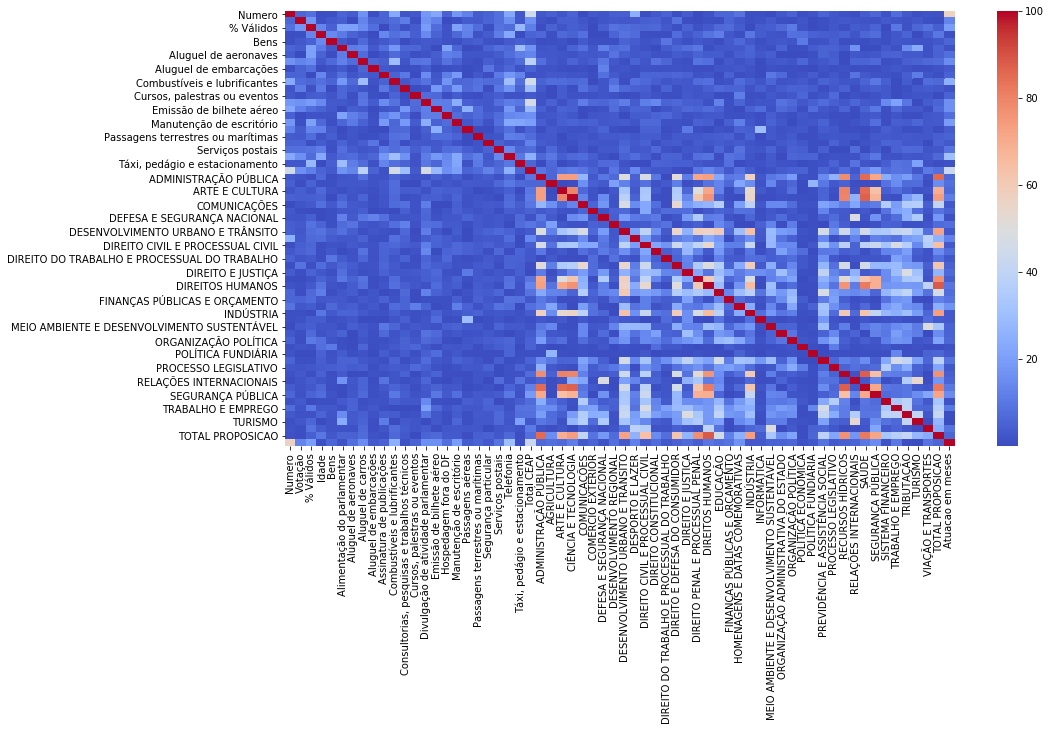

In [94]:
plt.figure(figsize=(15,8))
sns.heatmap(correlacao.replace(-100,100),cmap='coolwarm')

In [95]:
correlacao['Total CEAP'].idxmax()

'Divulgação de atividade parlamentar'

In [96]:
correlacao['Total CEAP'].max()

46.655596277349268

In [97]:
correlacao['Total CEAP'].sort_values(ascending=False)

Divulgação de atividade parlamentar              46.655596
Combustíveis e lubrificantes                     46.028913
Numero                                           45.217029
Atuacao em meses                                 42.587072
Aluguel de carros                                38.312767
Consultorias, pesquisas e trabalhos técnicos     29.820147
Emissão de bilhete aéreo                         28.320358
Telefonia                                        24.838669
Manutenção de escritório                         20.019768
SEGURANÇA PÚBLICA                                18.811043
Alimentação do parlamentar                       16.933452
Votação                                          16.143163
Hospedagem fora do DF                            16.045716
DESPORTO E LAZER                                 14.235151
Aluguel de aeronaves                             13.575681
DIREITOS HUMANOS                                 13.487291
Segurança particular                             12.6585

In [98]:
corr_CEAP = correlacao.drop(prop['AREAS_TEMATICAS_APRESENTACAO'].unique(), axis=1)
corr_CEAP.drop(prop['AREAS_TEMATICAS_APRESENTACAO'].unique(), axis=0, inplace=True)
corr_CEAP.drop('TOTAL PROPOSICAO', axis=1, inplace=True)
corr_CEAP.drop('TOTAL PROPOSICAO', axis=0, inplace=True)

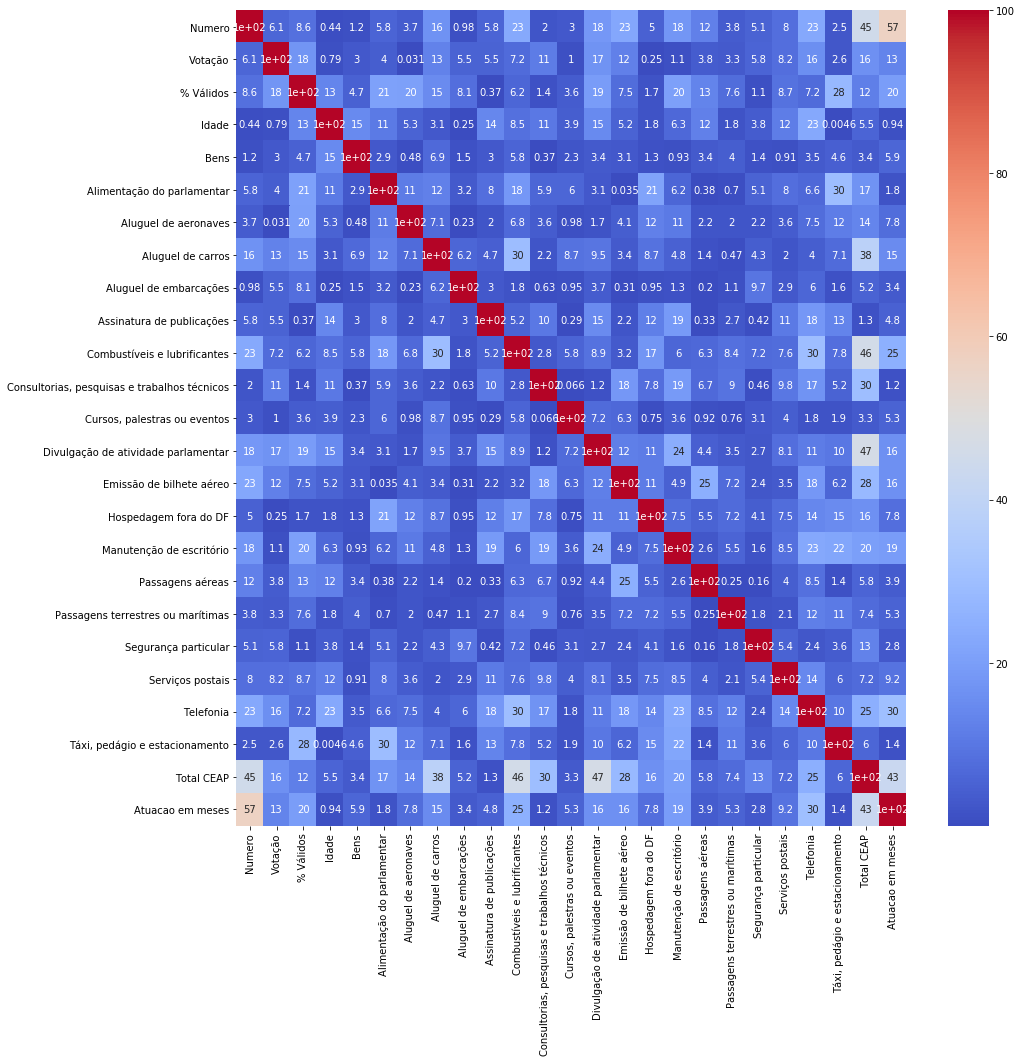

In [99]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_CEAP.replace(-100,100),cmap='coolwarm',annot=True)

In [100]:
corr_CEAP['Total CEAP'].idxmax()

'Divulgação de atividade parlamentar'

In [101]:
corr_CEAP['Total CEAP'].max()

46.655596277349268

In [102]:
corr_CEAP['Total CEAP'].sort_values(ascending=False)

Divulgação de atividade parlamentar              46.655596
Combustíveis e lubrificantes                     46.028913
Numero                                           45.217029
Atuacao em meses                                 42.587072
Aluguel de carros                                38.312767
Consultorias, pesquisas e trabalhos técnicos     29.820147
Emissão de bilhete aéreo                         28.320358
Telefonia                                        24.838669
Manutenção de escritório                         20.019768
Alimentação do parlamentar                       16.933452
Votação                                          16.143163
Hospedagem fora do DF                            16.045716
Aluguel de aeronaves                             13.575681
Segurança particular                             12.658549
% Válidos                                        12.067636
Passagens terrestres ou marítimas                 7.379479
Serviços postais                                  7.2167

In [103]:
corr_PROP = correlacao.drop(dataset['txtDescricao'].unique(), axis=1)
corr_PROP.drop(dataset['txtDescricao'].unique(), axis=0, inplace=True)
corr_PROP.drop('Total CEAP', axis=1, inplace=True)
corr_PROP.drop('Total CEAP', axis=0, inplace=True)

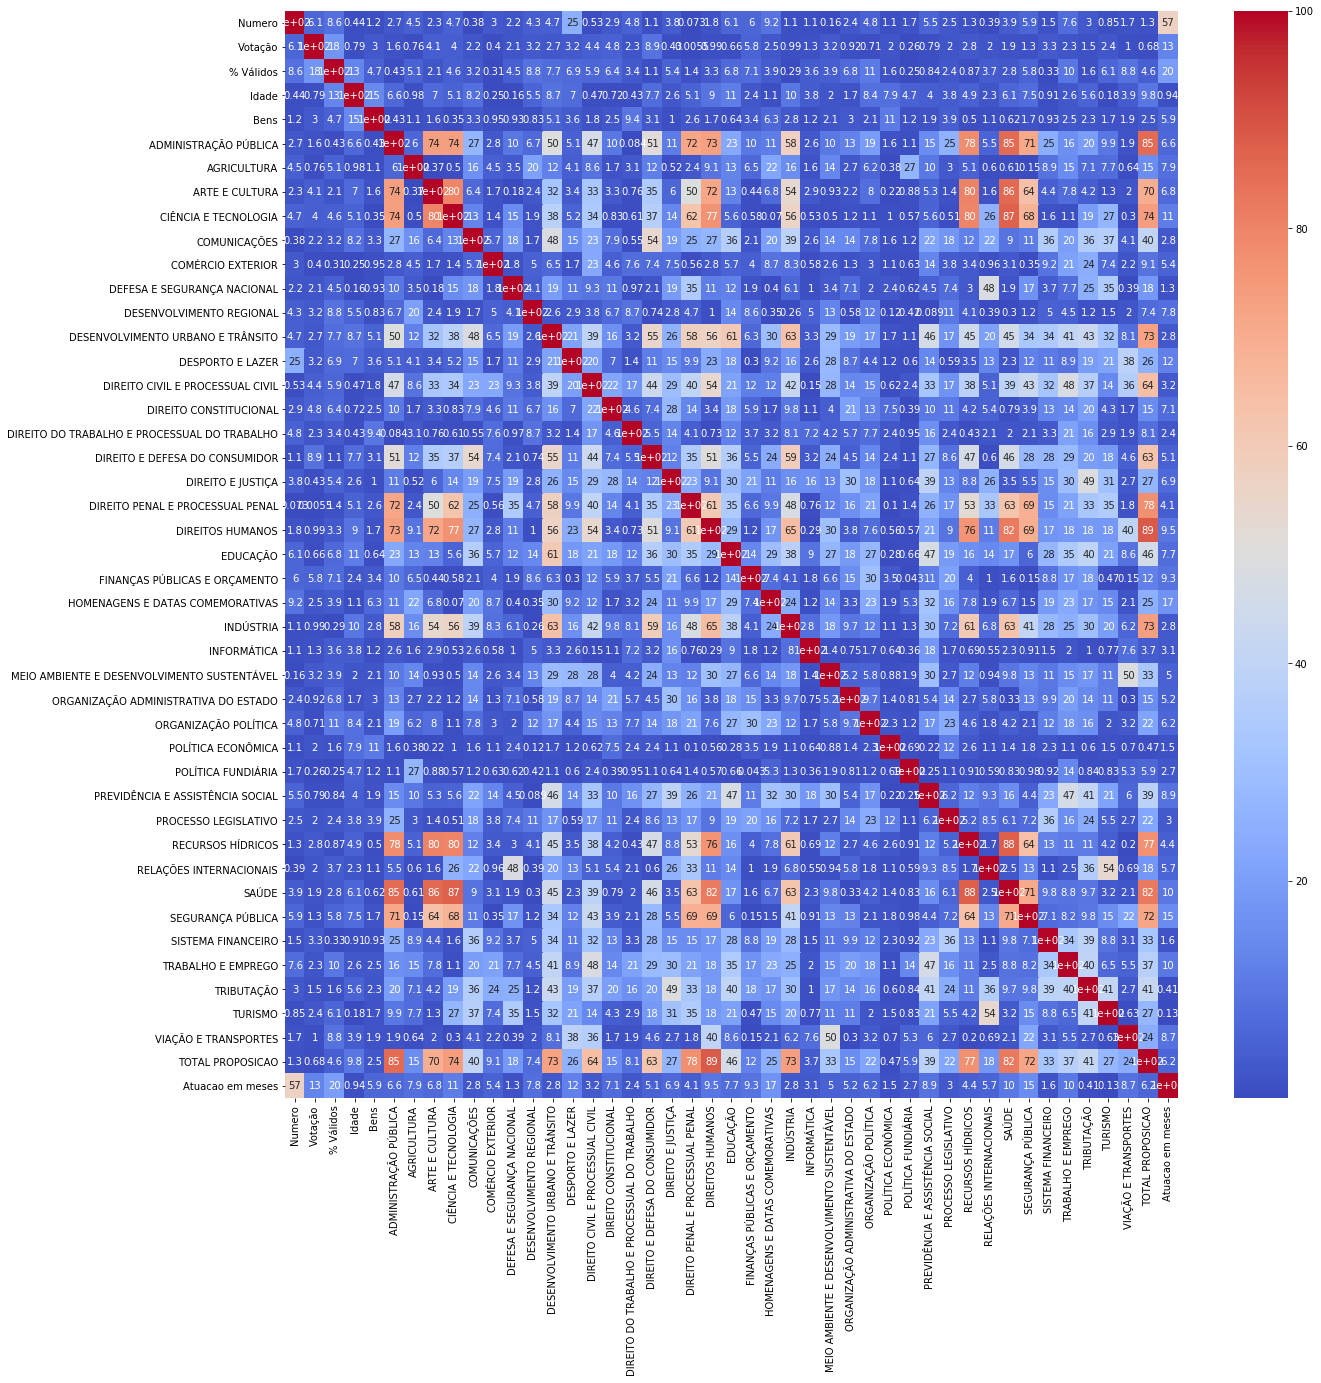

In [104]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_PROP.replace(-100,100),cmap='coolwarm',annot=True)

In [105]:
corr_PROP['TOTAL PROPOSICAO'].idxmax()

'DIREITOS HUMANOS'

In [106]:
corr_PROP['TOTAL PROPOSICAO'].max()

88.533363479043459

In [107]:
pd.get_dummies(deputados['Sexo'])

FEMININO  MASCULINO
0           0          1
1           0          1
2           0          1
3           0          1
4           0          1
5           0          1
6           0          1
7           0          1
8           0          1
9           0          1
10          0          1
11          0          1
12          0          1
13          0          1
14          0          1
15          0          1
16          0          1
17          0          1
18          0          1
19          0          1
20          0          1
21          0          1
22          0          1
23          0          1
24          0          1
25          1          0
26          0          1
27          0          1
28          0          1
29          1          0
..        ...        ...
570         0          1
571         0          1
572         1          0
573         0          1
574         0          1
575         0          1
576         1          0
577         0          1
578         0          1
579         0          1
580         1          0
581         0          1
582         0          1
583         0          1
584         1          0
585         0          1
586         0          1
587         0          1
588         0          1
589         0          1
590         0          1
591         0          1
592         0          1
593         0          1
594         0          1
595         0          1
596         0          1
597         0          1
598         0          1
599         0          1

[600 rows x 2 columns]

In [108]:
pd.get_dummies(deputados['Cor/Raça'])

Amarela  Branca  Parda  Preta
0          0       1      0      0
1          0       0      1      0
2          0       0      1      0
3          0       1      0      0
4          0       0      1      0
5          0       1      0      0
6          0       0      0      1
7          0       1      0      0
8          0       1      0      0
9          0       1      0      0
10         0       1      0      0
11         0       1      0      0
12         0       0      1      0
13         0       0      1      0
14         0       1      0      0
15         0       1      0      0
16         0       1      0      0
17         0       0      1      0
18         0       1      0      0
19         0       1      0      0
20         0       0      1      0
21         0       0      0      1
22         0       1      0      0
23         0       0      1      0
24         0       1      0      0
25         0       1      0      0
26         0       1      0      0
27         0       1      0      0
28         0       0      1      0
29         0       1      0      0
..       ...     ...    ...    ...
570        0       1      0      0
571        0       1      0      0
572        0       1      0      0
573        0       1      0      0
574        0       0      1      0
575        0       0      1      0
576        0       1      0      0
577        0       1      0      0
578        0       1      0      0
579        0       1      0      0
580        0       1      0      0
581        0       1      0      0
582        0       0      0      1
583        0       1      0      0
584        0       0      1      0
585        0       1      0      0
586        0       1      0      0
587        0       1      0      0
588        0       1      0      0
589        0       1      0      0
590        0       1      0      0
591        0       0      1      0
592        0       1      0      0
593        0       1      0      0
594        0       1      0      0
595        0       0      0      1
596        0       0      1      0
597        0       0      1      0
598        0       0      1      0
599        0       1      0      0

[600 rows x 4 columns]

In [109]:
pd.get_dummies(deputados['Instrucao'])

Ensino Fundamental completo  Ensino Fundamental incompleto  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   
6                              0                              0   
7                              0                              0   
8                              0                              0   
9                              0                              0   
10                             0                              0   
11                             0                              0   
12                             0                              0   
13                             0                              0   
14                             0                              0   
15                             0                              0   
16                             0                              0   
17                             0                              0   
18                             0                              0   
19                             0                              0   
20                             0                              0   
21                             0                              0   
22                             0                              0   
23                             0                              0   
24                             0                              0   
25                             0                              0   
26                             0                              0   
27                             0                              0   
28                             0                              0   
29                             0                              0   
..                           ...                            ...   
570                            0                              0   
571                            0                              0   
572                            0                              0   
573                            0                              0   
574                            0                              0   
575                            0                              0   
576                            0                              0   
577                            0                              0   
578                            0                              0   
579                            0                              0   
580                            0                              0   
581                            0                              0   
582                            0                              0   
583                            0                              0   
584                            0                              0   
585                            0                              0   
586                            0                              0   
587                            0                              0   
588                            0                              0   
589                            0                              0   
590                            0                              0   
591                            0                              0   
592                            0                              0   
593                            0                              0   
594                            0                              0   
595                            0                              0   
596                            0                              0   
597                            0                    

In [110]:
cor = pd.get_dummies(deputados['Cor/Raça'])
deputados['Total CEAP'] = deputados['Total CEAP'].astype(float)
cor.corrwith(deputados['Total CEAP']).sort_values(ascending=False)*100

Parda      1.942484
Amarela    0.930323
Branca    -0.432413
Preta     -3.104715
dtype: float64

In [111]:
instrucao = pd.get_dummies(deputados['Instrucao'])
instrucao.corrwith(deputados['Total CEAP']).sort_values(ascending=False)*100

Ensino Fundamental incompleto     2.738389
Superior incompleto               1.871939
Ensino Médio completo             1.506021
Superior completo                -1.143695
Ensino Fundamental completo      -1.210499
Ensino Médio incompleto          -1.590003
Lê e escreve                    -10.160452
dtype: float64

In [112]:
sexo = pd.get_dummies(deputados['Sexo'])
sexo.corrwith(deputados['Total CEAP']).sort_values(ascending=False)*100

MASCULINO    3.254417
FEMININO    -3.254417
dtype: float64

In [113]:
partidos.drop(['Idade','Bens','Atuacao em meses'], axis=1,inplace=True)

In [114]:
deputados['Partido Atual'].value_counts().sort_index()

DEM      33
PCdoB    14
PDT      25
PEN       3
PHS       7
PMDB     80
PODE     17
PP       52
PPS      12
PR       43
PRB      25
PROS      6
PRP       1
PRTB      1
PSB      41
PSC      11
PSD      42
PSDB     59
PSL       2
PSOL      6
PT       68
PTB      21
PTdoB     5
PV        8
REDE      4
SD       14
Name: Partido Atual, dtype: int64

In [115]:
partidos.sort_index(inplace=True)

In [116]:
partidos.head(19)

Numero  Votação  % Válidos  Alimentação do parlamentar  \
Partido Atual                                                                 
DEM             4042.576901  3487633      93.83                10571.232150   
PCdoB           4193.337500  1000637      25.14                 1458.913875   
PDT             4326.230275  2133574      74.80                 7167.652597   
PEN              276.783654   169454       3.33                  507.459591   
PHS             1025.781250   588503      20.45                 1591.607187   
PMDB           13415.143662  7906451     245.86                18269.575365   
PODE            6550.870991  1019898      35.81                 5645.817912   
PP              4724.627176  5462559     136.53                14106.743142   
PPS             4084.193750  1076992      17.99                 7744.645068   
PR              6261.294643  4952139     133.35                12588.323125   
PRB             1813.788029  3721610      66.82                 6613.659730   
PROS            2404.906250   675143      16.64                  516.099000   
PRP              277.750000    66910       4.83                    0.000000   
PRTB             722.000000    58095       4.20                  744.907500   
PSB            11877.975257  3754341     137.79                 9989.952472   
PSC             1530.430357  1728295      31.57                 2086.019350   
PSD            14704.127579  4365525     122.97                 8116.341044   
PSDB           20289.389577  7410094     173.71                14820.638720   
PSL              246.843750   135233       1.98                  246.772813   

               Aluguel de aeronaves  Aluguel de carros  \
Partido Atual                                            
DEM                     8243.500000      126810.320575   
PCdoB                   6171.830792       59794.093641   
PDT                     5336.575397      111141.731205   
PEN                        0.000000       18647.435457   
PHS                        0.000000       44908.018437   
PMDB                   18607.027879      301549.638872   
PODE                    9392.795699       76542.526218   
PP                     25904.754914      213431.433248   
PPS                     1761.125000       32068.442959   
PR                     20949.843750      190547.249405   
PRB                    14695.434375       95486.057569   
PROS                       0.000000       18269.885188   
PRP                        0.000000           0.000000   
PRTB                       0.000000        6840.000000   
PSB                    18726.115521      196559.754018   
PSC                      783.035714       15786.599375   
PSD                    39760.738408      160866.425336   
PSDB                   27184.333813      178572.410646   
PSL                        0.000000        6915.437500   

               Aluguel de embarcações  Assinatura de publicações  \
Partido Atual                                                      
DEM                        297.175000                1504.252974   
PCdoB                        0.666667                 521.679303   
PDT                          0.000000                1025.948118   
PEN                          0.000000                 146.087500   
PHS                          0.000000                  77.667500   
PMDB                       399.310313                4139.841889   
PODE                       112.500000                 699.769856   
PP                          82.500000                2033.459725   
PPS                          4.533750                 468.240652   
PR                         174.375000                1903.176875   
PRB                         61.468750                 545.445694   
PROS                         0.000000                  25.676875   
PRP                          0.000000                   0.000000   
PRTB                         0.000000                   0.000000   
PSB                         39.062500                1

In [117]:
for i in range(len(partidos)):
    partidos.iloc[i,2:] = partidos.iloc[i,2:]/deputados['Partido Atual'].value_counts().sort_index()[i]

In [118]:
partidos.sort_index(inplace= True)
partidos['Qtd'] = partidos1['Partido'].sort_index()
partidos['Total CEAP'] = partidos['Total CEAP'].astype(float)

In [119]:
partidos.sort_values('Qtd',ascending=False, inplace=True)

In [120]:
partidos.reset_index().to_csv("Partidos-BR-Dados-Por-Periodo.csv", sep=';', encoding='latin1',index=False, decimal=',')

In [121]:
partidos['TOTAL PROPOSICAO'] = partidos['TOTAL PROPOSICAO'].astype(float)
partidos.sort_values('TOTAL PROPOSICAO',ascending=True)

Numero  Votação  % Válidos  Alimentação do parlamentar  \
Partido Atual                                                                 
PRTB             722.000000    58095   4.200000                  744.907500   
PEN              276.783654   169454   1.110000                  169.153197   
PRP              277.750000    66910   4.830000                    0.000000   
PSL              246.843750   135233   0.990000                  123.386406   
PT              8475.609469  7110590   2.556324                  238.424295   
PSOL             883.000000   939781   1.945000                   31.389323   
PSDB           20289.389577  7410094   2.944237                  251.197266   
PTB             1822.766353  1978276   2.559524                  138.009021   
PR              6261.294643  4952139   3.101163                  292.751701   
PHS             1025.781250   588503   2.921429                  227.372455   
PSB            11877.975257  3754341   3.360732                  243.657377   
PODE            6550.870991  1019898   2.106471                  332.106936   
PTdoB           1112.019886   361630   1.634000                  119.222739   
PPS             4084.193750  1076992   1.499167                  645.387089   
PCdoB           4193.337500  1000637   1.795714                  104.208134   
PRB             1813.788029  3721610   2.672800                  264.546389   
PROS            2404.906250   675143   2.773333                   86.016500   
PDT             4326.230275  2133574   2.992000                  286.706104   
DEM             4042.576901  3487633   2.843333                  320.340368   
PSC             1530.430357  1728295   2.870000                  189.638123   
PSD            14704.127579  4365525   2.927857                  193.246215   
PP              4724.627176  5462559   2.625577                  271.283522   
PV              2098.245833   597478   1.158750                  208.707628   
PMDB           13415.143662  7906451   3.073250                  228.369692   
REDE             732.593750   335289   1.287500                  139.521875   
SD              3117.604167  1576563   2.716429                  242.762183   

               Aluguel de aeronaves  Aluguel de carros  \
Partido Atual                                            
PRTB                       0.000000        6840.000000   
PEN                        0.000000        6215.811819   
PRP                        0.000000           0.000000   
PSL                        0.000000        3457.718750   
PT                       284.794535        3470.646384   
PSOL                       0.000000        1284.400469   
PSDB                     460.751421        3026.651028   
PTB                     1217.755486        3830.094421   
PR                       487.205669        4431.331382   
PHS                        0.000000        6415.431205   
PSB                      456.734525        4794.140342   
PODE                     552.517394        4502.501542   
PTdoB                    143.987500        2452.274801   
PPS                      146.760417        2672.370247   
PCdoB                    440.845057        4271.006689   
PRB                      587.817375        3819.442303   
PROS                       0.000000        3044.980865   
PDT                      213.463016        4445.669248   
DEM                      249.803030        3842.736987   
PSC                       71.185065        1435.145398   
PSD                      946.684248        3830.152984   
PP                       498.168364        4104.450639   
PV                         0.000000        3073.833001   
PMDB                     232.587848        3769.370486   
REDE                       0.000000         532.867188   
SD                       581.816384        3254.038884   

               Aluguel de embarcações  Assinatura de publicações  \
Partido Atual                                                      
PRTB                         0.000000          

In [122]:
deputados.groupby(["Partido Atual",'Sexo']).count()['Partido']

Partido Atual  Sexo     
DEM            FEMININO      2
               MASCULINO    31
PCdoB          FEMININO      6
               MASCULINO     8
PDT            FEMININO      2
               MASCULINO    23
PEN            MASCULINO     3
PHS            MASCULINO     7
PMDB           FEMININO      7
               MASCULINO    73
PODE           FEMININO      2
               MASCULINO    15
PP             FEMININO      2
               MASCULINO    50
PPS            FEMININO      4
               MASCULINO     8
PR             FEMININO      5
               MASCULINO    38
PRB            FEMININO      3
               MASCULINO    22
PROS           MASCULINO     6
PRP            MASCULINO     1
PRTB           MASCULINO     1
PSB            FEMININO      6
               MASCULINO    35
PSC            FEMININO      1
               MASCULINO    10
PSD            FEMININO      1
               MASCULINO    41
PSDB           FEMININO      6
               MASCULINO    53
PSL           

In [123]:
deputados.groupby(["Partido Atual",'Cor/Raça']).count()['Partido']

Partido Atual  Cor/Raça
DEM            Branca      27
               Parda        6
PCdoB          Branca       4
               Parda        7
               Preta        3
PDT            Branca      17
               Parda        7
               Preta        1
PEN            Branca       2
               Parda        1
PHS            Branca       3
               Parda        3
               Preta        1
PMDB           Branca      69
               Parda       10
               Preta        1
PODE           Branca      13
               Parda        4
PP             Amarela      1
               Branca      41
               Parda       10
PPS            Branca      11
               Parda        1
PR             Branca      35
               Parda        6
               Preta        2
PRB            Branca      17
               Parda        5
               Preta        3
PROS           Branca       6
PRP            Branca       1
PRTB           Branca       1
PSB            B

In [124]:
deputados.groupby(["Partido Atual",'Instrucao']).count()

Nome Civil  Nome para Urna  \
Partido Atual Instrucao                                                   
DEM           Ensino Médio completo                   2               2   
              Superior completo                      27              27   
              Superior incompleto                     4               4   
PCdoB         Ensino Médio completo                   1               1   
              Superior completo                      10              10   
              Superior incompleto                     3               3   
PDT           Ensino Médio completo                   2               2   
              Superior completo                      22              22   
              Superior incompleto                     1               1   
PEN           Ensino Médio completo                   1               1   
              Superior completo                       1               1   
              Superior incompleto                     1               1   
PHS           Ensino Fundamental incompleto           1               1   
              Ensino Médio completo                   2               2   
              Superior completo                       3               3   
              Superior incompleto                     1               1   
PMDB          Ensino Fundamental completo             1               1   
              Ensino Médio completo                   3               3   
              Ensino Médio incompleto                 1               1   
              Superior completo                      67              67   
              Superior incompleto                     8               8   
PODE          Ensino Fundamental completo             1               1   
              Ensino Médio completo                   5               5   
              Superior completo                      10              10   
              Superior incompleto                     1               1   
PP            Ensino Fundamental completo             2               2   
              Ensino Médio completo                   7               7   
              Ensino Médio incompleto                 1               1   
              Superior completo                      38              38   
              Superior incompleto                     4               4   
...                                                 ...             ...   
PSB           Superior incompleto                     3               3   
PSC           Ensino Médio completo                   1               1   
              Superior completo                       8               8   
              Superior incompleto                     2               2   
PSD           Ensino Médio completo                   4               4   
              Ensino Médio incompleto                 2               2   
              Superior completo                      33              33   
              Superior incompleto                     3               3   
PSDB          Ensino Médio completo                   2               2   
              Superior completo                      57              57   
PSL           Ensino Fundamental completo             1               1   
              Ensino Médio completo                   1               1   
PSOL          Superior completo                       6               6   
PT            Ensino Fundamental completo             4               4   
              Ensino Fundamental incompleto           1               1   
              Ensino Médio completo                   1               1   
              Superior completo                      61              61   
              Superior incompleto                     1               1   
PTB           Ensino Fundamental completo             2               2   
              Superior completo                      18              18   
              Superior incompleto                     1               